- ショートカット
    - `M`:Markdownに
    - `Y`:commandに    

## 必要なパッケージをimport
```
sudo apt-get install ffmpeg
```

In [1]:
from sympy.geometry import *
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.animation as animation
import math
import numpy as np

<br>

# 2リンクの運動学を解く

In [12]:
def kinematics(base_x, base_y, link_length, rad):
    """
    二次元の運動学を解く

    Parameters
    ----------
    base_x : float
        基準座標系のx座標
    base_y : float
        基準座標系のy座標
    link_length : float
        リンクの長さ
    rad: float
        ワールド座標系とリンクのなす角

    Returns
    -------
    x : 運動学計算後の結果(x座標)
    y : 運動学計算後の結果(y座標)
    """

    x = base_x + link_length*math.cos(rad)
    y = base_y + link_length*math.sin(rad)
    return x, y

<br>

# 物体の定義

In [13]:
class Circle2d():
    def __init__(self, r, x, y):
        self.r = r
        self.x = x
        self.y = y

class Segment2d():
    def __init__(self, start_x, start_y, end_x, end_y):
        self.start_x = start_x
        self.start_y = start_y
        self.end_x = end_y
        self.end_y = end_y

<br>

# 衝突判定

In [17]:
class CollisionCheck():
    def __init__():
        pass
    def circle_and_segment(circle_r, circle_x, circle_y, tip_line_x, tip_line_y, end_line_x, end_line_y):
        """
        円と線分の衝突判定を実施

        Parameters
        ----------
        circle_r : float
            円の半径
        circle_x : float
            円の中心座標のx座標
        circle_y : float
            円の中心座標のy座標
        tip_line_x : float
            線分の先端のx座標
        tip_line_y : float
            線分の先端のy座標
        end_line_x : float
            線分の末端のx座標
        end_line_y : float
            線分の末端のy座標

        Returns
        -------
        hit : bool
            円の線分が衝突しているかどうかの結果
        """
        #線分の始点から円の中心点の方向に向かうベクトル
        tip_line_to_circle_center_x =  circle_x-tip_line_x
        tip_line_to_circle_center_y = circle_y-tip_line_y
        #線分の終点から円の中心点の方向に向かうベクトル
        end_line_to_circle_center_x = circle_x-end_line_x
        end_line_to_circle_center_y = circle_y-end_line_y
        #線分の始点から円の中心点の方向に向かうベクトルの大きさ
        tip_line_size = math.sqrt((tip_line_to_circle_center_x)**2 + (tip_line_to_circle_center_y)**2)
        #線分の終点から円の中心点の方向に向かうベクトルの大きさ
        end_line_size = math.sqrt((end_line_to_circle_center_x)**2 + (end_line_to_circle_center_y)**2)

        #線分のベクトルの大きさ
        line_size = math.sqrt((end_line_x-tip_line_x)**2 + (end_line_y-tip_line_y)**2)

        #単位ベクトル化
        unit_x = (end_line_x-tip_line_x)/line_size
        unit_y = (end_line_y-tip_line_y)/line_size

        #【線分】と【線分の始点から円の中心点の方向に向かうベクトル】の内積
        line_and_tip_line_to_circle_center_dot = (end_line_x-tip_line_x) * tip_line_to_circle_center_x + (end_line_y - tip_line_y) * tip_line_to_circle_center_y

        #【線分】と【線分の終点から円の中心点の方向に向かうベクトル】の内積
        line_and_end_line_to_circle_center_dot = (end_line_x-tip_line_x) * end_line_to_circle_center_x + (end_line_y - tip_line_y) * end_line_to_circle_center_y

        #線分と円の中心点との距離　A×B = Ax*By - Bx*Ay = |A||B|sinθ
        dis_line_and_circle = abs(unit_x * (circle_y-tip_line_y) - (circle_x-tip_line_x) * unit_y)

        #print("aaaaaaaa",r1_line1_min)
        #print("aaaaaaaa",r1_line2_min)

        #リンク１の接触判定----------------
        hit = False
        if(dis_line_and_circle < circle_r):#直線内に円がある（線分内にあるかはこの時点で不明）
            #print("接触している可能性がある")
            #結果が同じ(A、Bともに鋭角 or 鈍角)場合は範囲外(触れていない可能性がある)
            if( (line_and_tip_line_to_circle_center_dot < 0 and line_and_end_line_to_circle_center_dot < 0) or (line_and_tip_line_to_circle_center_dot == 0 and line_and_end_line_to_circle_center_dot == 0)):
                hit = False
            else:#二つの結果(Aが鋭角、Bが鈍角等)が異なれば線分の範囲内(確定で接触)
                hit = True
                #print("接触している(Aが鋭角、Bが鈍角等2つの結果が異なる)")
        if(hit == False):
            #線分の末端が円の範囲内にあるかどうか
            if((tip_line_size < circle_r) or (end_line_size < circle_r)):
                hit = True#確定で接触
                #print("B接触している（線分の末端が円の範囲内にある）")
            else:
                hit = False#確定で非接触 
        return hit      


<br>

# メイン文

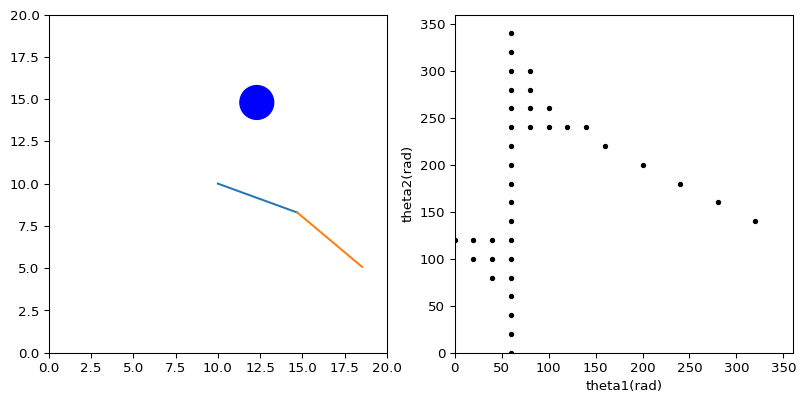

In [21]:
def main():
    #障害物は真円の物体ひとつのみとする※アームが宙に浮いているイメージ
    link1_length = 5
    link2_length = 5
    x0 = link1_length+link2_length
    y0 = link1_length+link2_length #[リンクを最大限伸ばした数値]を原点とする※(以降で導出するx1,x2,y1,y2でマイナスの数値が出ないようにするため)
    circle_x1 = (x0 + 2.3)
    circle_y1= (y0 + 4.8)
    r1 = 1.0

    #### 描画設定 ###########################
    fig = plt.figure(figsize=(10,5),dpi=96)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_aspect("equal")#画像の比率を同じにする
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_aspect("equal")#画像の比率を同じにする
    # 軸の範囲
    plt.axes(ax1)
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.xlim([0, 8])
    #plt.ylim([0, 8])
    plt.axes(ax2)
    plt.xlabel('theta1(rad)')
    plt.ylabel('theta2(rad)')
    circle1 = pat.Circle(xy = (circle_x1, circle_y1), radius= r1, color="blue")
    ax1.add_patch(circle1)
    ax1.set_xlim(0, (link1_length+link2_length)*2)#x方向（プラスマイナス)に最大限リンクを伸ばしても見える範囲
    ax1.set_ylim(0, (link1_length+link2_length)*2)#グラフを表示した時の比率を1:1にするためxと同じ範囲に設定
    ax2.set_xlim(0, 360)
    ax2.set_ylim(0, 360)
    ########################################

    class Theta2:
        val = 0
    class Theta1:
        laps = 0

    RESOLUTION = 20 # 分解能が高い（=1RESOLUTIONの値が小さい）とアニメーション作成に時間がかかる
    def updata(theta1):
        ## 描画設定 ##
        ax1.cla()
        ax1.set_xlim(0, (link1_length+link2_length)*2)
        ax1.set_ylim(0, (link1_length+link2_length)*2)
        ax1.add_patch(circle1)
        ##################

        theta1 = theta1*RESOLUTION # 分解能分だけ，theta1を進める
        if (theta1 % 360 == 0) and (theta1 != 0):
            Theta1.laps += 1 #そのままだと360度を超えるので何周しているかを数える
            Theta2.val += RESOLUTION #そのままだと毎回theta2が0度になってしまうためクラス経由で

        theta1 = theta1 - Theta1.laps*360 # theta1を 0 - 360の間に抑える
        theta2 = Theta2.val
        rad1 = theta1 * math.pi/180
        rad2 = theta2 * math.pi/180

        x1, y1 = kinematics(x0, y0, link1_length, rad1)
        x2, y2 = kinematics(x1, y1, link2_length, rad1+rad2)
        
        ####描画部分#####################################
        # セグメント（線分）の生成
        s0 = Segment(Point(x0, y0),Point(x1, y1))
        s3 = Segment(Point(x1, y1),Point(x2, y2))
        segments = [s0, s3]
        # グラフ描画
        for i,s in enumerate(segments) :
            ax1.plot([s.p1.x, s.p2.x], [s.p1.y, s.p2.y])
        ############################################################3

        hit1 = CollisionCheck.circle_and_segment(r1, circle_x1, circle_y1, x0, y0, x1, y1)
        hit2 = CollisionCheck.circle_and_segment(r1, circle_x1, circle_y1, x1, y1, x2, y2)
        #リンク1またはリンク2のどちらかが接触したら描画
        
        if(hit1 == True or hit2 == True):
            ax2.plot(theta1, theta2, color='black',marker='.')

    ani = animation.FuncAnimation(fig, updata, interval=100,  frames = int((360/RESOLUTION)*(360/RESOLUTION)))
    #ani = animation.FuncAnimation(fig, updata, interval=200,  frames = int( ((360+RESOLUTION)/RESOLUTION)) )
    #ani.save('anim.gif', writer="imagemagick")
    ani.save('anim2.mp4', writer="ffmpeg")
    plt.show()
    #608m 57.9s
    #####################################

if __name__ == "__main__":
    main()
